In [1]:
import numpy as np
import matplotlib.pyplot as plt
from genetic_one import Gen1

In [2]:
def function_a(x):
    x=x[0]
    return x*x+3*x-5+np.sqrt(np.sqrt(x**2))+5*np.sin(x-5)*2*x

def rgb_from_x(x):
    return (np.sqrt((1-(function_a(x)/max_Y)*(function_a(x)/max_Y))**2),0.5, (function_a(x)/max_Y)*(function_a(x)/max_Y))

a = 50
X =[i for i in range(-a,a)]
Y =[function_a([x]) for x in X]
max_Y=max(Y)

In [3]:
# Experiment settings

#Hyperparameters of the model
model_par = {
    
    'cell_split_number': 5, 
    'subjects_in_cell': 1,

    'nr_clones': 5,
    'mutation_gaussian_sd': 4,

    'pins': 5,
    'gene_quality': 1,
    
}

#
input_size = 1 # since our function has one variable this is a trivial scenario.
bounds =[[-a,a]] # searching intervals for the solution

# Experiment
experiment = Gen1(function_a ,input_size, bounds, model_par)

gen_0 [[-49], [-30], [-4], [30], [39]]


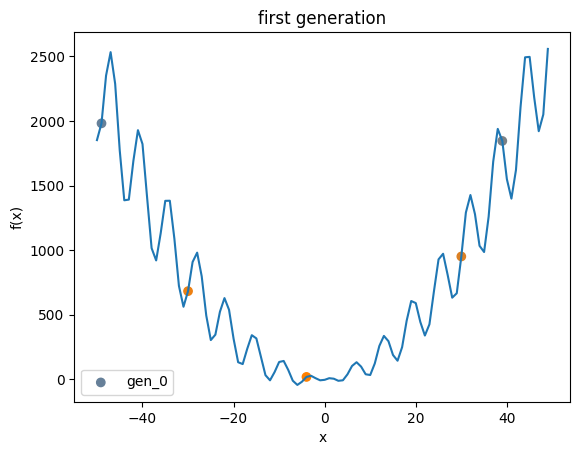

In [4]:
# first generation
# 'cell_split_number': 5 and  'subjects_in_cell': 2,
#  we expect 10 possible solutions.

gen_0 = experiment.first_generation()
experiment.actual_generation = gen_0

print("gen_0", gen_0)
plt.scatter(gen_0,[function_a(x) for x in gen_0] , c=[rgb_from_x(x) for x in gen_0], label='gen_0')
plt.plot(X,Y)
plt.title('first generation')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend()

Epochs 0/5
Evolution process ended!
Last generation: [[4], [4], [-14], [-14], [-14], [4], [-14], [-14], [-14], [-31], [-31], [-31], [-31], [-31], [-31]]
Epochs 1/5
Evolution process ended!
Last generation: [[-12], [-19], [-4], [-4], [-4], [-26], [-11], [-11], [-11], [4], [4], [4], [4], [4], [4]]
Epochs 2/5
Evolution process ended!
Last generation: [[4], [4], [-2], [-2], [-2], [4], [-2], [-2], [-2], [-7], [-7], [-7], [-7], [-7], [-7]]
Epochs 3/5
Evolution process ended!
Last generation: [[4], [-1], [4], [4], [4], [-6], [-1], [-1], [-1], [4], [4], [4], [4], [4], [4]]
Epochs 4/5
Evolution process ended!
Last generation: [[4], [4], [4], [4], [4], [3], [4], [4], [4], [4], [4], [4], [4], [4], [4]]


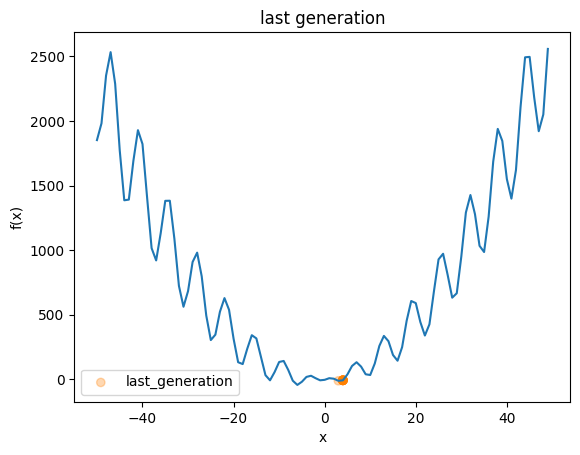

In [5]:
## Automate evolution

nr_epochs = 5
last_generation, history= experiment.evolve(nr_epochs,history=True)
fit = [function_a(x) for x in last_generation] 
plt.scatter(last_generation, fit , c=[rgb_from_x(x) for x in last_generation], label='last_generation', alpha=0.3)
plt.plot(X,Y)
plt.title('last generation')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend()

In [6]:
function_a([-6])

-44.54992265025903

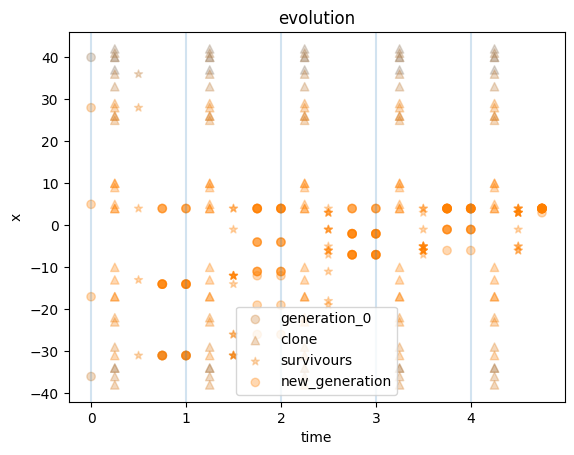

In [7]:
step=0.25
time = 0

for i in range(5):
    gen_0 = history[i]['gen_0']
    Y0=[time for _ in gen_0]
    colours =[rgb_from_x(x) for x in gen_0]
    time=time+step
    if i==0:
        plt.scatter(Y0,gen_0, c=colours, label='generation_0', alpha=0.3)
    else:
        plt.scatter(Y0,gen_0, c=colours, alpha=0.3)
        
    cf = history[0]['clone_family']
    clone_family =[]
    for f in cf:
        for c in f:
            clone_family.append(c)

    Y0=[time for _ in clone_family]
    colours =[rgb_from_x(x)  for x in clone_family]
    time=time+step
    if i==0:
        plt.scatter(Y0,clone_family, c=colours, label='clone',marker='^', alpha=0.3)
    else:
        plt.scatter(Y0,clone_family, c=colours,marker='^', alpha=0.3)
        
    survivours= history[i]['generation']
    Y0=[time for _ in survivours]
    colours =[rgb_from_x(x)  for x in survivours]
    time=time+step
    if i==0:
        plt.scatter(Y0,survivours, c=colours, label='survivours',marker='*', alpha=0.3)
    else:
        plt.scatter(Y0,survivours, c=colours,marker='*', alpha=0.3)

    new_generation= history[i]['new_generation']
    Y0=[time for _ in new_generation]
    colours =[rgb_from_x(x)  for x in new_generation]
    time=time+step
    if i==0:
        plt.scatter(Y0,new_generation, c=colours, label='new_generation',marker='o', alpha=0.3)
    else:
        plt.scatter(Y0,new_generation, c=colours,marker='o', alpha=0.3)



    plt.axvline(x=i,alpha =0.2)

plt.title('evolution')
plt.ylabel('x')
plt.xlabel('time')
plt.legend()

matrix shape:20/100
[-1000, -1000, -1000, -1000, -1000, 37.236067977499786, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, 631.3497894530815, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, 1550.0514875218762, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, 1131.8958392303048, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, 235.618383046249, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000]


/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_11660/328711332.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels([str(i) for i in range(100)])
/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_11660/328711332.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels([str(t) for t in range(timelines)])


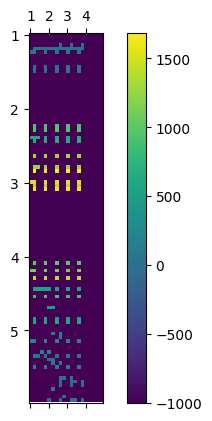

In [8]:
a=50
timelines =5*4
time = 0
step=1
matrix= [ [-1000 for _ in range(-a,a)]for _ in range(timelines)]
print("matrix shape:{}/{}".format(len(matrix),len(matrix[0])))




for i in range(5):
    gen_0 = history[i]['gen_0']
    Y0=[time for _ in gen_0]
    colours = [rgb_from_x(x) for x in gen_0]
    
    for x in gen_0:
        matrix[time][x[0]] = function_a(x)  
        

    time=time+step
    
    
    
    cf = history[0]['clone_family']
    clone_family =[]
    for f in cf:
        for c in f:
            clone_family.append(c)
    
    Y0=[time for _ in clone_family]
    colours =[rgb_from_x(x)  for x in clone_family]
    for x in clone_family:
        matrix[time][x[0]] = function_a(x) 

    time=time+step
    
        
    survivours= history[i]['generation']
    Y0=[time for _ in survivours]
    colours =[rgb_from_x(x)  for x in survivours]
    for x in survivours:
        matrix[time][x[0]] = function_a(x)
    
    time=time+step


#     new_generation= history[i]['new_generation']
#     Y0=[time for _ in new_generation]
#     for x in new_generation:
#         matrix[time][x[0]] = function_a(x)
#     time=time+step

print(matrix[0])
origina_mat= matrix
matrix = np.array(matrix).transpose()



figure = plt.figure()
axes = figure.add_subplot(111)
 
# using the matshow() function
new_m=[]
for i in range(len(origina_mat)):
    new_m.append(origina_mat[i])
caxes = axes.matshow(np.array(new_m).transpose())
figure.colorbar(caxes)
 
axes.set_yticklabels([str(i) for i in range(100)])
axes.set_xticklabels([str(t) for t in range(timelines)])

plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = (0.1,1)
plt.gca()
plt.show()

In [9]:
## quick gradient based method


In [10]:
def aprox_grad(x, delta_x=0.0000001):
    
    return (function_a([x+delta_x])-function_a([x]))/delta_x

def gradient_descent(gradient, start, learn_rate, n_iter):
    history =[]
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        vector += diff
        history.append(vector)
    return vector, history


start = 25
learn_rate = 0.001
n_iter =10
best, history= gradient_descent(aprox_grad, start, learn_rate, n_iter)

print("best x:{} , f(x):{}".format(best, function_a([best])))

best x:22.68345421387039 , f(x):373.84071695472767


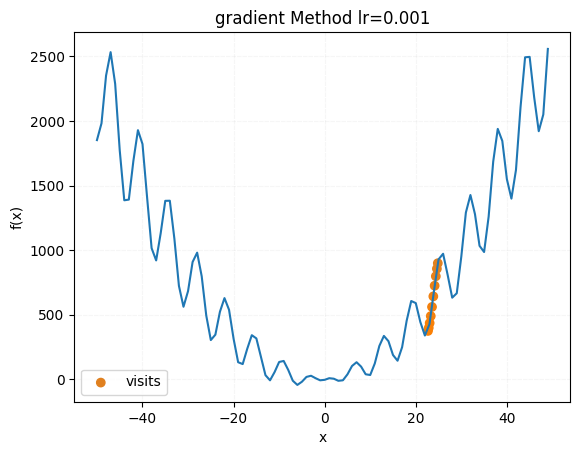

In [11]:
plt.scatter(history,[function_a([x]) for x in history] , c=[rgb_from_x([x]) for x in history], label='visits')
plt.plot(X,Y)
plt.title('gradient Method lr=0.001')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend()